In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv('./datasets/kobe-bryant-shot-selection/data.csv')

In [10]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


# Data Cleaning

In [11]:
df.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [12]:
#According to kaggle the values that have a null value in shotmade is our kaggle test
test_df = df[df['shot_made_flag'].isnull()]


In [13]:
#Drop the null values in original dataset and drop the column completely in test dataset
df.dropna(subset='shot_made_flag',inplace=True)
test_df.drop(columns=['shot_made_flag'],inplace=True)


/var/folders/bz/pvrgk0h97r94tfv108njgpr00000gn/T/ipykernel_81444/2871393873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=['shot_made_flag'],inplace=True)


In [14]:
# Turn the matchup into a home game or away game
df['home_away'] = df['matchup'].map(lambda x: 0 if 'vs' in x else 1)
test_df['home_away'] = test_df['matchup'].map(lambda x: 0 if 'vs' in x else 1)

/var/folders/bz/pvrgk0h97r94tfv108njgpr00000gn/T/ipykernel_81444/1231123563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['home_away'] = test_df['matchup'].map(lambda x: 0 if 'vs' in x else 1)


In [15]:
# Combined the minutes and seconds columns to have time left in one game
df['count_down'] = df['minutes_remaining'] * 60 + df['seconds_remaining']
test_df['count_down'] = test_df['minutes_remaining'] * 60 + test_df['seconds_remaining']

/var/folders/bz/pvrgk0h97r94tfv108njgpr00000gn/T/ipykernel_81444/4120153637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['count_down'] = test_df['minutes_remaining'] * 60 + test_df['seconds_remaining']


In [16]:
# Dropped columns that looked like it wouldn't give a lot of information
df.drop(columns = ['game_event_id','game_id','team_id','team_name','matchup','minutes_remaining','seconds_remaining','lat','lon','shot_zone_range'],inplace = True)
test_df.drop(columns = ['game_event_id','game_id','team_id','team_name','matchup','minutes_remaining','seconds_remaining','lat','lon','shot_zone_range'],inplace = True)

/var/folders/bz/pvrgk0h97r94tfv108njgpr00000gn/T/ipykernel_81444/416016105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns = ['game_event_id','game_id','team_id','team_name','matchup','minutes_remaining','seconds_remaining','lat','lon','shot_zone_range'],inplace = True)


In [17]:
# Change game_date to date time
df['game_date'] = pd.to_datetime(df['game_date'])
test_df['game_date'] = pd.to_datetime(test_df['game_date'])

/var/folders/bz/pvrgk0h97r94tfv108njgpr00000gn/T/ipykernel_81444/1021942169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['game_date'] = pd.to_datetime(test_df['game_date'])


In [18]:
#sort the dataframe by by game_date and then reset the index to have the dataframe in order by year
df.sort_values('game_date',inplace = True)
df.reset_index(drop = True, inplace = True)

test_df.sort_values('game_date',inplace = True)
test_df.reset_index(drop = True, inplace = True)

/var/folders/bz/pvrgk0h97r94tfv108njgpr00000gn/T/ipykernel_81444/4017722181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.sort_values('game_date',inplace = True)


# EDA

Text(0.5, 0, 'Shot Made')

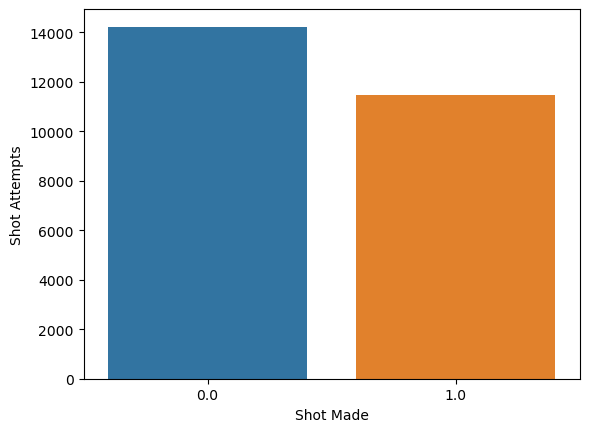

In [19]:
sns.countplot(data = df, x ='shot_made_flag')
plt.ylabel('Shot Attempts')
plt.xlabel('Shot Made')

''

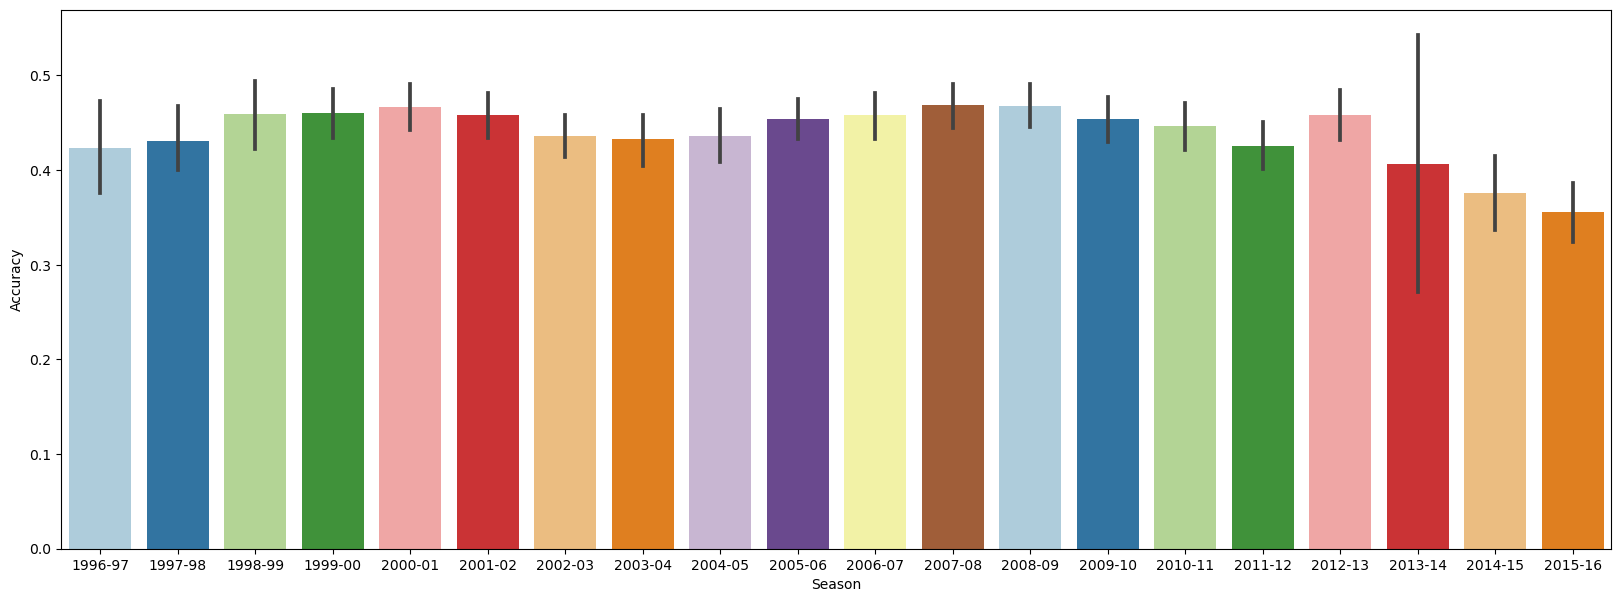

In [20]:
plt.figure(figsize = (20,7))
sns.barplot(data = df, x ='season',y = 'shot_made_flag',palette='Paired')
plt.ylabel('Accuracy')
plt.xlabel('Season')
;

Text(0, 0.5, 'Shot Type')

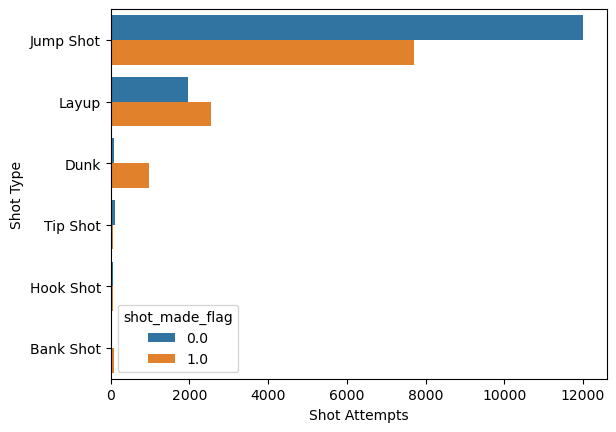

In [21]:
sns.countplot(data = df, y = 'combined_shot_type',hue ='shot_made_flag')
plt.xlabel('Shot Attempts')
plt.ylabel('Shot Type')

Text(0, 0.5, 'Shot Location(y)')

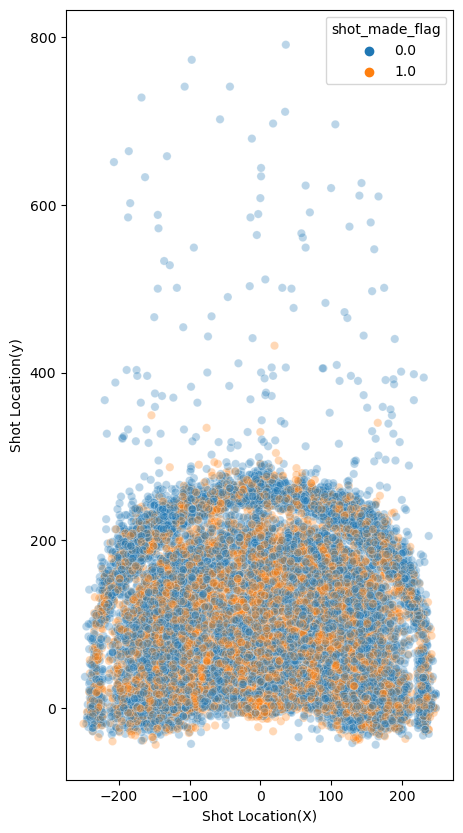

In [22]:
plt.figure(figsize =(5,10))
sns.scatterplot(data = df, x ='loc_x',y = 'loc_y',alpha = 0.3,hue='shot_made_flag')
plt.xlabel('Shot Location(X)')
plt.ylabel('Shot Location(y)')

<AxesSubplot:xlabel='loc_x', ylabel='loc_y'>

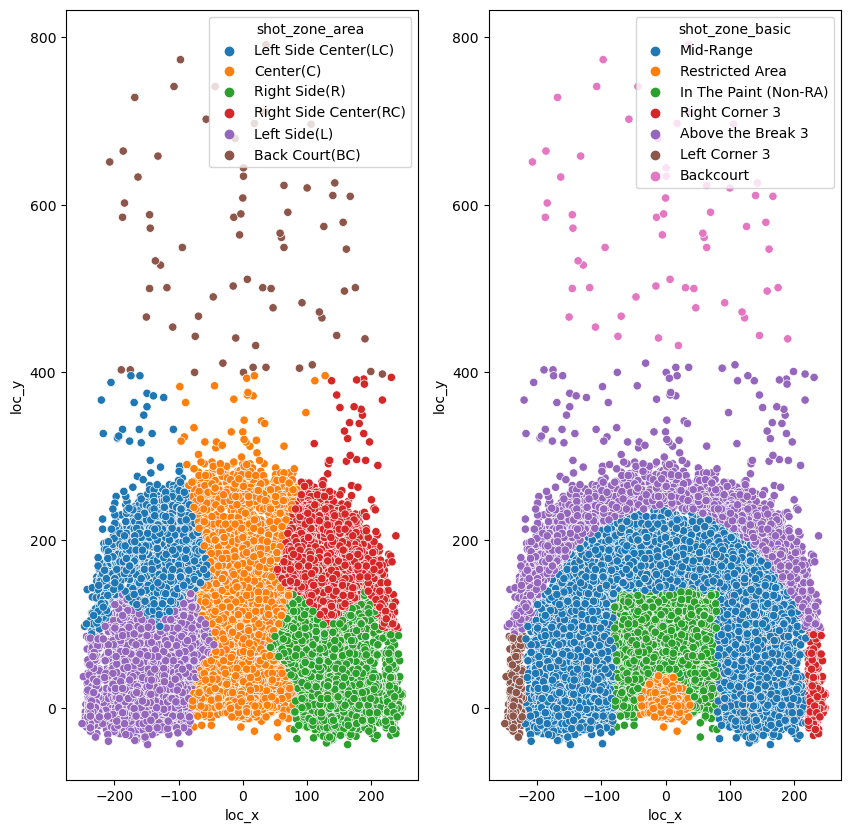

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,10))
sns.scatterplot(data = df,x = 'loc_x',y='loc_y',hue = 'shot_zone_area',ax = ax1)
sns.scatterplot(data = df, x ='loc_x',y = 'loc_y',hue='shot_zone_basic',ax = ax2)






/var/folders/bz/pvrgk0h97r94tfv108njgpr00000gn/T/ipykernel_81444/1428199401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['shot_made_flag']].sort_values(by = ['shot_made_flag'], ascending = False),


<AxesSubplot:>

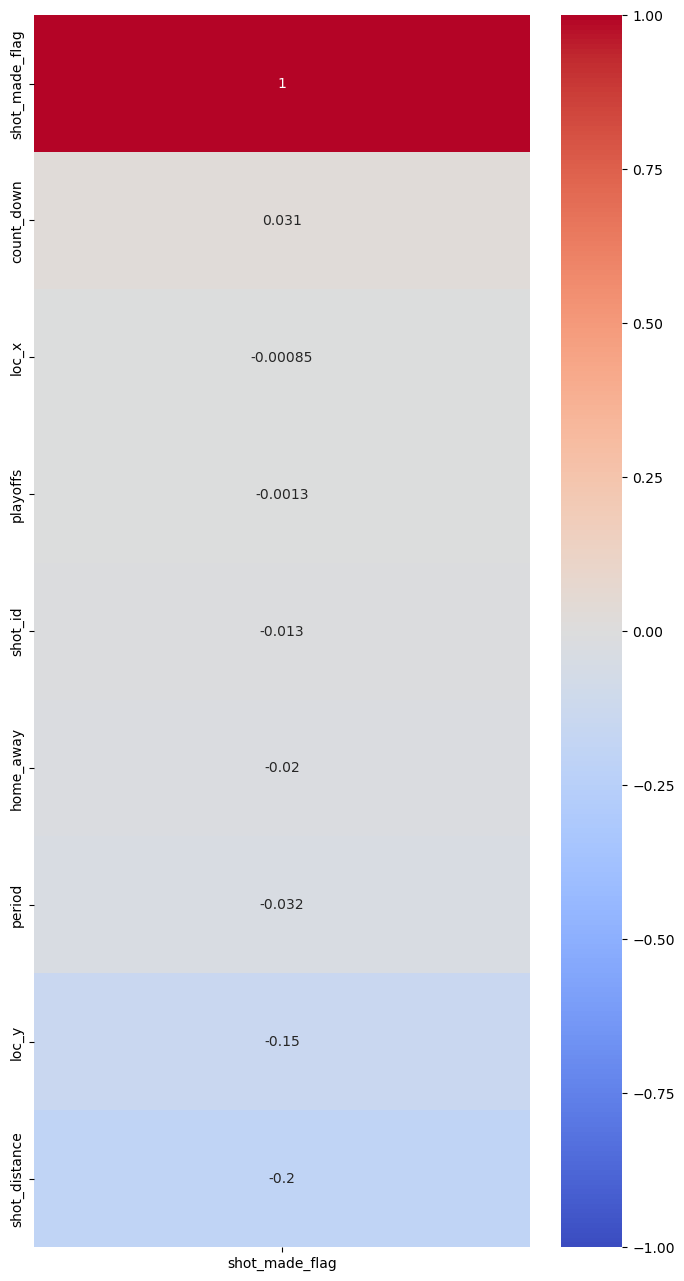

In [24]:
plt.figure(figsize = (8,16))
sns.heatmap(df.corr()[['shot_made_flag']].sort_values(by = ['shot_made_flag'], ascending = False), 
            cmap = 'coolwarm',
           vmin = -1,
           vmax = 1, 
           annot = True)

# Data Processing

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer

In [26]:
# Create our target variable
X = df.drop(columns = 'shot_made_flag')
y = df['shot_made_flag']

In [27]:
#Baseline Score
y.value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

In [28]:
# Imported the columntransformer so we Standard scale the numerical columns and one hot encode the categorical columns
processor = ColumnTransformer([
    ('ss', StandardScaler(), ['shot_distance', 'period', 'count_down', 'loc_y', 'loc_x']),
    ('ohe', OneHotEncoder(drop= 'first'), ['combined_shot_type', 'shot_zone_area', 'shot_zone_basic', 'opponent'])
    ])

In [29]:
#transform our data
X_sc = processor.fit_transform(X)
test_df_X = processor.fit_transform(test_df)


In [30]:
#Train Test split
X_train,X_test,y_train,y_test = train_test_split(X_sc,y,random_state= 42, shuffle = False)

In [31]:
test_df

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,game_date,opponent,shot_id,home_away,count_down
0,Jump Shot,Jump Shot,75,177,2,0,1996-97,19,2PT Field Goal,Right Side Center(RC),Mid-Range,1996-11-08,TOR,22907,1,438
1,Layup Shot,Layup,0,0,3,0,1996-97,0,2PT Field Goal,Center(C),Restricted Area,1996-11-08,TOR,22909,1,205
2,Jump Shot,Jump Shot,-27,223,2,0,1996-97,22,3PT Field Goal,Center(C),Mid-Range,1996-11-17,PHX,22930,1,98
3,Jump Shot,Jump Shot,-226,30,2,0,1996-97,22,3PT Field Goal,Left Side(L),Left Corner 3,1996-11-17,PHX,22927,1,371
4,Jump Shot,Jump Shot,179,164,2,0,1996-97,24,3PT Field Goal,Right Side Center(RC),Above the Break 3,1996-11-17,PHX,22926,1,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Pullup Jump shot,Jump Shot,-40,115,3,0,2015-16,12,2PT Field Goal,Center(C),In The Paint (Non-RA),2016-04-13,UTA,22877,0,521
4996,Jump Shot,Jump Shot,110,131,4,0,2015-16,17,2PT Field Goal,Right Side Center(RC),Mid-Range,2016-04-13,UTA,22887,0,622
4997,Jump Shot,Jump Shot,-1,51,4,0,2015-16,5,2PT Field Goal,Center(C),In The Paint (Non-RA),2016-04-13,UTA,22892,0,404
4998,Pullup Jump shot,Jump Shot,69,129,4,0,2015-16,14,2PT Field Goal,Center(C),In The Paint (Non-RA),2016-04-13,UTA,22899,0,87


In [32]:
#Instantiate PCA
pca = PCA(random_state=42)
pca.fit(X_train.todense())
Z_train = pca.transform(X_train.todense())
test_df_Z = pca.transform(test_df_X.todense())
Z_test = pca.transform(X_test.todense())


/Users/jaysonv/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/jaysonv/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/jaysonv/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/

In [33]:
#Showcase how much variance each principal component is giving us
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {np.round(var_exp[:20], 3)}')

Explained variance (first 20 components): [0.299 0.145 0.135 0.128 0.069 0.031 0.018 0.017 0.012 0.01  0.009 0.008
 0.008 0.007 0.007 0.006 0.006 0.006 0.006 0.005]


In [34]:
#With the first 20 components we get 93% of our variance in our dataset explained
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 20 components): {np.round(cum_var_exp[:20], 3)}')

Cumulative explained variance (first 20 components): [0.299 0.444 0.579 0.707 0.776 0.807 0.825 0.842 0.854 0.864 0.873 0.88
 0.888 0.895 0.902 0.908 0.914 0.92  0.926 0.931]


# Modelling


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [46]:
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier())
])
pipe_params_rf = {
    'rf__max_depth':[1,3,7],
    'rf__random_state':[42],
    'rf__n_estimators':[100,300]
}

In [47]:
gs_rf = GridSearchCV(pipe_rf,
                        param_grid = pipe_params_rf,
                        cv = 3)

In [48]:
gs_rf.fit(Z_train,y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [1, 3, 7],
                         'rf__n_estimators': [100, 300],
                         'rf__random_state': [42]})

In [50]:
print(gs_rf.score(Z_train,y_train))
print(gs_rf.score(Z_test,y_test))

0.6131174761311747
0.6161867704280156


In [51]:
## XGB

In [52]:
import xgboost as xgb

In [53]:
#Ran a pipeline with xgb in it so we can gridsearch the xgboost
pipe_xgb = Pipeline([
    ('xgb',xgb.XGBClassifier())
])
pipe_params_xgb = {
    'xgb__learning_rate': [0.1,0.3,1.0],
    'xgb__max_depth':[1,3,7],
    'xgb__base_score':[0.7,1.0],
    'xgb__random_state':[42],
    'xgb__n_estimators':[100,300]
}


In [54]:
gs_xgb = GridSearchCV(pipe_xgb,
                        param_grid = pipe_params_xgb,
                        cv = 3)

In [55]:
gs_xgb.fit(Z_train,y_train)

/Users/jaysonv/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jaysonv/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jaysonv/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/jaysonv/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/xgboost/core.py

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                  

In [56]:
print(gs_xgb.score(Z_train,y_train))
print(gs_xgb.score(Z_test,y_test))

0.6128061436280614
0.619455252918288


Our model isn't overfit, but with test score being higher than train, I suspect that the
random state could have been lucky in testing. Either way with our model we can see that our 62% accuracy is 7% higher than the baseline score.

In [57]:
# Test Data Predictions
test_df['shot_made_flag']=gs_xgb.predict(test_df_X) 


/var/folders/bz/pvrgk0h97r94tfv108njgpr00000gn/T/ipykernel_81444/1363267143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['shot_made_flag']=gs_xgb.predict(test_df_X)


In [58]:
test_df[['shot_id','shot_made_flag']].to_csv('./datasets/submissions.csv',index = False)

Create a new csv for kaggle that has the shotid and if the predicted shot made it